### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the dataset

In [2]:
data = pd.read_csv("Flight_Fare.csv")

In [3]:
# calling the data to do all the basic checks
data.head(8)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270


### Domain Analysis

##### Indipendent variables
Airline: So this column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.<br>
Date_of_Journey: This column will let us know about the date on which the passenger’s journey will start.<br>
Source: This column holds the name of the place from where the passenger’s journey will start.<br>
Destination: This column holds the name of the place to where passengers wanted to travel.<br>
Route: Here we can know about what the route is through which passengers have opted to travel from his/her source to their destination.<br>
Arrival_Time: Arrival time is when the passenger will reach his/her destination.<br>
Duration: Duration is the whole period that a flight will take to complete its journey from source to destination.<br>
Total_Stops: This will let us know in how many places flights will stop there for the flight in the whole journey.<br>
Additional_Info: In this column, we will get information about food, kind of food, and other amenities.<br>
##### Dependent variable
Price: Price of the flight for a complete journey including all the expenses before onboarding.<br>

In [4]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [8]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### Exploratory Data Analysis

<AxesSubplot:xlabel='Airline', ylabel='Count'>

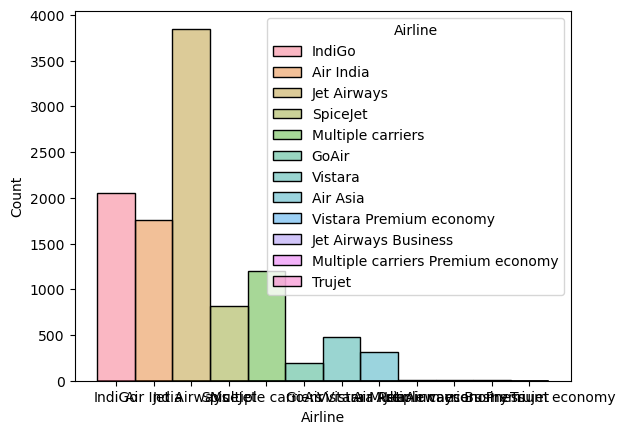

In [9]:
# Univariate Analysis
sns.histplot(x=data.Airline,hue=data.Airline)

<AxesSubplot:xlabel='Source', ylabel='Count'>

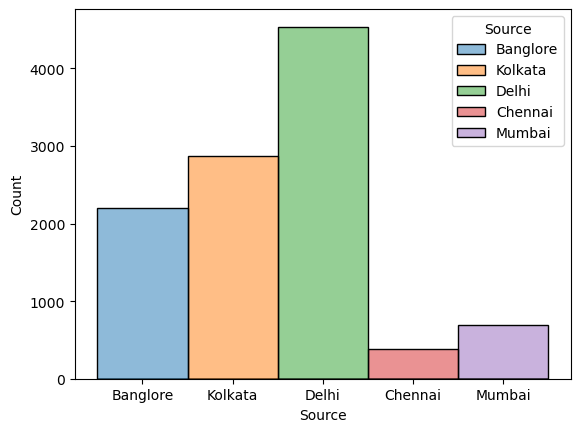

In [10]:
sns.histplot(x=data.Source,hue=data.Source)

<AxesSubplot:xlabel='Destination', ylabel='Count'>

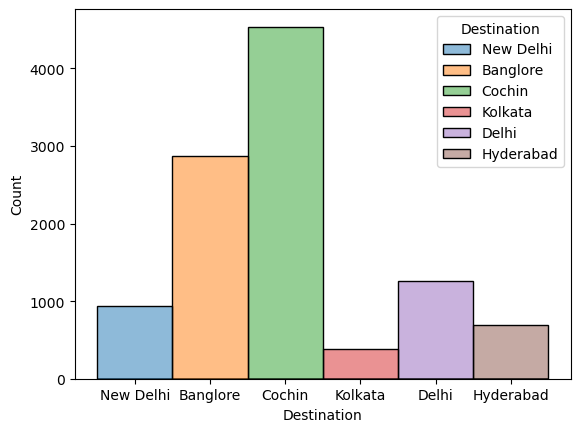

In [11]:
sns.histplot(x=data.Destination,hue=data.Destination)

<AxesSubplot:xlabel='Source', ylabel='Price'>

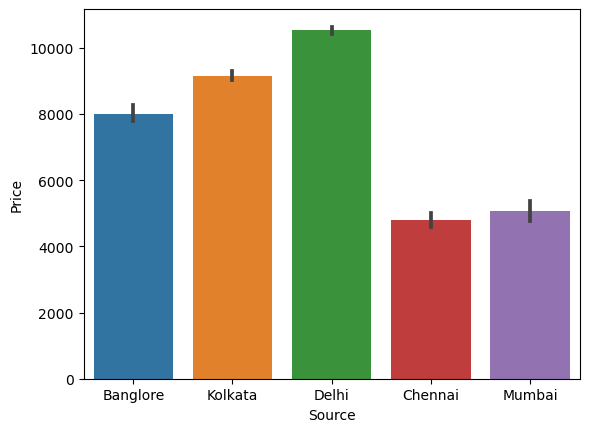

In [12]:
# Bivariate Analysis
sns.barplot(x=data.Source,y=data.Price)

<AxesSubplot:xlabel='Airline', ylabel='Price'>

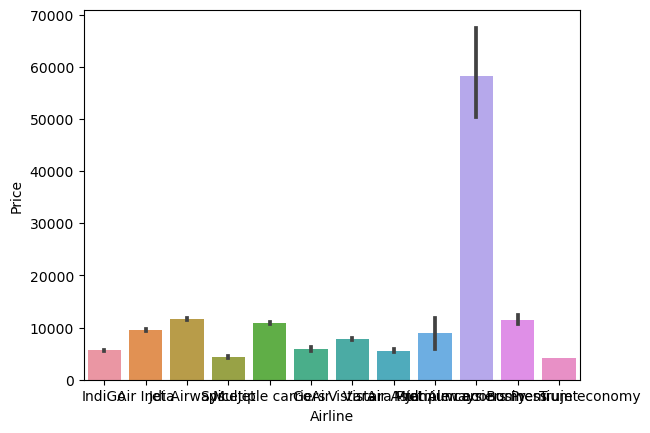

In [13]:
sns.barplot(x=data.Airline,y=data.Price)

<AxesSubplot:xlabel='Duration', ylabel='Price'>

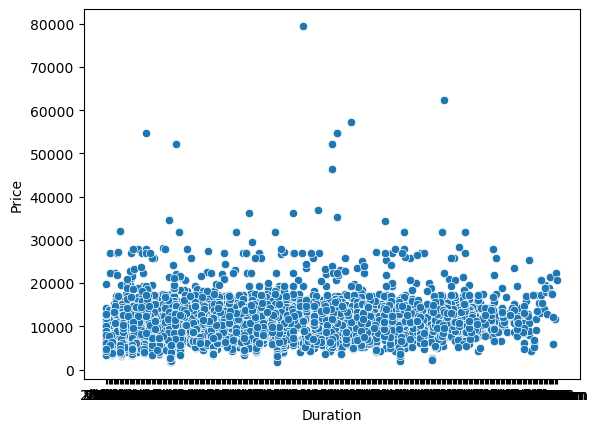

In [14]:
sns.scatterplot(x=data.Duration,y=data.Price)

### Data preprocessing

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
# Using labelling to label all the categorical data in Airline column and ranking them based on number of times used
data['Airline'].replace(["Jet Airways","IndiGo","Air India","Multiple carriers","SpiceJet","Vistara","Air Asia","GoAir","Multiple carriers Premium economy","Jet Airways Business","Vistara Premium economy","Trujet"],[12,11,10,9,8,7,6,5,4,3,2,1],inplace = True)

In [17]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
# Extract relevant features from the date
data['Day'] = data['Date_of_Journey'].dt.day
data['Month'] = data['Date_of_Journey'].dt.month
data['Year'] = data['Date_of_Journey'].dt.year

In [18]:
data.head(8)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,11,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,10,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,12,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,11,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,11,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019
5,8,2019-06-24,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,2019
6,12,2019-12-03,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019
7,12,2019-01-03,Banglore,New Delhi,BLR ? BOM ? DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,3,1,2019


In [19]:
# Dropping the original date column as no longer needed
data.drop('Date_of_Journey', axis=1, inplace=True)

In [20]:
data.Source.value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [21]:
data['Source'].replace(["Delhi","Kolkata","Banglore","Mumbai","Chennai"],[5,4,3,2,1],inplace = True)

In [22]:
data.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [23]:
data['Destination'].replace(["Cochin","Banglore","Delhi","New Delhi","Hyderabad","Kolkata"],[6,5,4,3,2,1],inplace = True)

In [24]:
data.Route.value_counts()

DEL ? BOM ? COK          2376
BLR ? DEL                1552
CCU ? BOM ? BLR           979
CCU ? BLR                 724
BOM ? HYD                 621
                         ... 
CCU ? VTZ ? BLR             1
CCU ? IXZ ? MAA ? BLR       1
BOM ? COK ? MAA ? HYD       1
BOM ? CCU ? HYD             1
BOM ? BBI ? HYD             1
Name: Route, Length: 128, dtype: int64

In [25]:
# Dropping the original date column as no longer needed
data.drop('Route', axis=1, inplace=True)

In [26]:
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])

In [27]:
data['Duration'] = data['Duration'].str.replace('h', '*60').str.replace(' ','+').str.replace('m','*1').map(eval)

# The 'Duration' column now contains the duration in minutes as a numerical value


In [28]:
data.Total_Stops.fillna('1 stop',inplace=True)

In [29]:
data.Total_Stops.value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [30]:
data['Total_Stops'].replace(['4 stops','3 stops','2 stops','1 stop','non-stop'],[4,3,2,1,0],inplace=True)

In [31]:
data.Additional_Info.value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [32]:
data.drop('Additional_Info',axis=1,inplace=True)

In [33]:
data.head(8)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,Year
0,11,3,3,2023-05-17 22:20:00,01:10 22 Mar,170,0,3897,24,3,2019
1,10,4,5,2023-05-17 05:50:00,13:15,445,2,7662,5,1,2019
2,12,5,6,2023-05-17 09:25:00,04:25 10 Jun,1140,2,13882,6,9,2019
3,11,4,5,2023-05-17 18:05:00,23:30,325,1,6218,5,12,2019
4,11,3,3,2023-05-17 16:50:00,21:35,285,1,13302,3,1,2019
5,8,4,5,2023-05-17 09:00:00,11:25,145,0,3873,24,6,2019
6,12,3,3,2023-05-17 18:55:00,10:25 13 Mar,930,1,11087,3,12,2019
7,12,3,3,2023-05-17 08:00:00,05:05 02 Mar,1265,1,22270,3,1,2019


In [34]:
data.drop('Arrival_Time',axis=1,inplace=True)

In [35]:
data.head(8)

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Price,Day,Month,Year
0,11,3,3,2023-05-17 22:20:00,170,0,3897,24,3,2019
1,10,4,5,2023-05-17 05:50:00,445,2,7662,5,1,2019
2,12,5,6,2023-05-17 09:25:00,1140,2,13882,6,9,2019
3,11,4,5,2023-05-17 18:05:00,325,1,6218,5,12,2019
4,11,3,3,2023-05-17 16:50:00,285,1,13302,3,1,2019
5,8,4,5,2023-05-17 09:00:00,145,0,3873,24,6,2019
6,12,3,3,2023-05-17 18:55:00,930,1,11087,3,12,2019
7,12,3,3,2023-05-17 08:00:00,1265,1,22270,3,1,2019


In [36]:
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])

data['Dep_Hour'] = data['Dep_Time'].dt.hour
data['Dep_Minute'] = data['Dep_Time'].dt.minute

# Convert the hour and minute components into a fractional representation of a day
data['Depar_Time'] = data['Dep_Hour'] + data['Dep_Minute'] / 60.0

# Drop the original datetime and extracted components if no longer needed
data.drop(['Dep_Time', 'Dep_Hour', 'Dep_Minute'], axis=1, inplace=True)


In [37]:
data.head(8)

,Airline,Source,Destination,Duration,Total_Stops,Price,Day,Month,Year,Depar_Time
0,11,3,3,170,0,3897,24,3,2019,22.333333
1,10,4,5,445,2,7662,5,1,2019,5.833333
2,12,5,6,1140,2,13882,6,9,2019,9.416667
3,11,4,5,325,1,6218,5,12,2019,18.083333
4,11,3,3,285,1,13302,3,1,2019,16.833333
5,8,4,5,145,0,3873,24,6,2019,9.000000
6,12,3,3,930,1,11087,3,12,2019,18.916667
7,12,3,3,1265,1,22270,3,1,2019,8.000000


In [38]:
data.Total_Stops.value_counts()

1    5626
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Airline      10683 non-null  int64  
 1   Source       10683 non-null  int64  
 2   Destination  10683 non-null  int64  
 3   Duration     10683 non-null  int64  
 4   Total_Stops  10683 non-null  int64  
 5   Price        10683 non-null  int64  
 6   Day          10683 non-null  int64  
 7   Month        10683 non-null  int64  
 8   Year         10683 non-null  int64  
 9   Depar_Time   10683 non-null  float64
dtypes: float64(1), int64(9)
memory usage: 834.7 KB


### Model Creation

In [40]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Day', 'Month', 'Year', 'Depar_Time'],
      dtype='object')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Airline      10683 non-null  int64  
 1   Source       10683 non-null  int64  
 2   Destination  10683 non-null  int64  
 3   Duration     10683 non-null  int64  
 4   Total_Stops  10683 non-null  int64  
 5   Price        10683 non-null  int64  
 6   Day          10683 non-null  int64  
 7   Month        10683 non-null  int64  
 8   Year         10683 non-null  int64  
 9   Depar_Time   10683 non-null  float64
dtypes: float64(1), int64(9)
memory usage: 834.7 KB


In [42]:
# Independent and dependent variable creation
X=data[['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Day', 'Month', 'Year', 'Depar_Time']] ## X variable contains all inputs
y=data.Price ## y is output

In [43]:
X

,Airline,Source,Destination,Duration,Total_Stops,Day,Month,Year,Depar_Time
0,11,3,3,170,0,24,3,2019,22.333333
1,10,4,5,445,2,5,1,2019,5.833333
2,12,5,6,1140,2,6,9,2019,9.416667
3,11,4,5,325,1,5,12,2019,18.083333
4,11,3,3,285,1,3,1,2019,16.833333
...,...,...,...,...,...,...,...,...,...
10678,6,4,5,150,0,4,9,2019,19.916667
10679,10,4,5,155,0,27,4,2019,20.750000
10680,12,3,4,180,0,27,4,2019,8.333333
10681,7,3,3,160,0,3,1,2019,11.500000


In [44]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

In [45]:
# Traning and testing data creation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)

In [46]:
X_train

,Airline,Source,Destination,Duration,Total_Stops,Day,Month,Year,Depar_Time
6722,12,4,5,475,1,18,5,2019,8.416667
3184,9,5,6,845,1,15,5,2019,4.916667
8352,10,5,6,1125,1,15,5,2019,13.500000
3731,12,4,5,345,1,6,12,2019,14.083333
598,12,5,6,1615,2,6,1,2019,9.666667
...,...,...,...,...,...,...,...,...,...
6528,11,3,4,170,0,18,6,2019,20.000000
2693,12,3,3,365,1,3,1,2019,18.666667
8076,12,4,5,1745,1,24,5,2019,17.000000
3829,9,5,6,730,1,6,1,2019,7.083333


In [47]:
y_train

6722    14781
3184     9103
8352    10671
3731     9899
598     10368
        ...  
6528     4823
2693    35185
8076    13067
3829    12927
7624    10844
Name: Price, Length: 8546, dtype: int64

In [48]:
X_train.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Day',
       'Month', 'Year', 'Depar_Time'],
      dtype='object')

In [49]:
# Using min max scaler in indipendent variables
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Day','Month', 'Year', 'Depar_Time']]=scale.fit_transform(data[['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Day','Month', 'Year', 'Depar_Time']])

In [50]:
# Creating model Linear regression
from sklearn.linear_model import LinearRegression
LR=LinearRegression() # object creation
LR.fit(X_train,y_train) # training of linear regression
y_predict=LR.predict(X_test)

In [51]:
y_test #Actual values

10626     4340
10052    31945
7672      7690
1727     14151
8767     14388
         ...  
8152      7120
2716     10441
6359      7229
2173     10844
2434     14781
Name: Price, Length: 2137, dtype: int64

In [52]:
y_predict #Predict values

array([ 4505.95341227,  5185.58086129, 10870.98429852, ...,
        5824.27110438,  9850.82881819,  9571.65765958])

In [53]:
#Model Evalution

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score
r2score=r2_score(y_test,y_predict)
r2score

0.4396434155203581

In [54]:
# Using Decision Tree
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()#object creation for decision tree  
dt.fit(X_train,y_train)#training the model
y_hat=dt.predict(X_test)#prediction
y_hat#predicted values 

array([ 3898,  4435,  7690, ...,  7229, 14571, 10844], dtype=int64)

In [55]:
r2sco=r2_score(y_hat,y_predict)
r2sco

0.4123586599968022